# Data pre-processing in Python

In this exercise we will learn how to perform the most basic data pre-processing operations (normalization, one-hot-encoding, binarization) using `scikit-learn` and `pandas` libraries.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing

## Fisher dataset (Iris)

Function `load_iris()` creates the object representing the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
iris = datasets.load_iris()

print('Feature names: ', iris.feature_names)
print('Decision classes: ', iris.target_names)

print('shape of the dataset: ', iris.data.shape)
print('shape of labels: ', iris.target.shape)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Decision classes:  ['setosa' 'versicolor' 'virginica']
shape of the dataset:  (150, 4)
shape of labels:  (150,)


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In this exercise we will be using [pandas](https://pandas.pydata.org) to store the data and temporary results. Pandas is a highly specialized library fully compatibile with [Numerical Python](http://www.numpy.org) and [SciKit Learn](http://scikit-learn.org), the primary libraries for data mining and machine learning in Python. Two nice introductions to Pandas can be found here:

* [Introduction to Pandas in Python](https://medium.com/@wbusaka/a-gentle-introduction-to-pandas-5ed17421a59d), 
* [Quick introduction to Pandas Python library](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)

In [4]:
# create a new DataFrame object
df = pd.DataFrame(iris.data)

In [5]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# adding a new column (feature)
df['target'] = iris.target

In [7]:
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.columns

Index([0, 1, 2, 3, 'target'], dtype='object')

In [9]:
# changing the list of column names
df.columns = iris.feature_names + ['target']

# display first 10 rows
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Each column in the `DataFrame` object has the type `Series` and has [a very rich API](https://pandas.pydata.org/docs/reference/series.html). 

In [10]:
df['sepal length (cm)'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

A very useful function is `apply()` which allows to define *ad hoc* functions executed against columns.

In [11]:
# quick way to summarize a column
df['sepal length (cm)'].apply(np.round)

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
145    7.0
146    6.0
147    6.0
148    6.0
149    6.0
Name: sepal length (cm), Length: 150, dtype: float64

In [12]:
# create a binary vector representing the results of evaluating a condition
df['sepal length (cm)'].head().apply(lambda x: x > 5.0)

0     True
1    False
2    False
3    False
4    False
Name: sepal length (cm), dtype: bool

In [13]:
# create a condition-based index for quick access to subsets of data
sepal_idx = df['sepal length (cm)'] > 7.0

In [14]:
sepal_idx

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal length (cm), Length: 150, dtype: bool

In [15]:
# display only rows that fullfill the condition
df[sepal_idx]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
102,7.1,3.0,5.9,2.1,2
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
109,7.2,3.6,6.1,2.5,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2
125,7.2,3.2,6.0,1.8,2
129,7.2,3.0,5.8,1.6,2
130,7.4,2.8,6.1,1.9,2


We will use the [MatPlot](https://matplotlib.org) library to draw basic plots. There are many more advanced alternatives to `Matplot`, such as `Seaborn`, `Bokeh`, `plotnine`, but `Matplot` will be sufficient for our purposes.

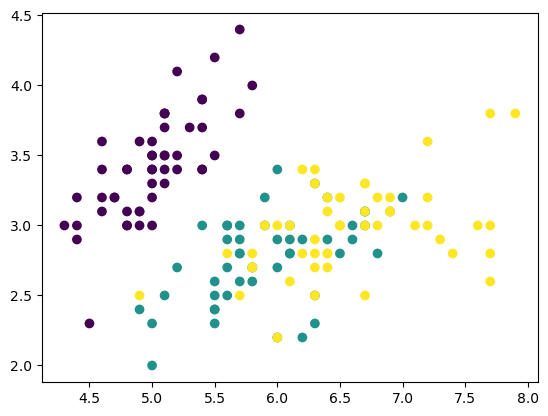

In [16]:
x = df['sepal length (cm)'][:]
y = df['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

A similar effect can be achieved by using directly the `plot()` method of the `pandas.Series` object. In the following example `iloc` is the *index localization*, it addresses all the rows `:` and columns from the second to the third `[1,2]` (keep in mind that the indexing of rows and columns starts at 0).

In [17]:
df.iloc[:,1:3]

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


<AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

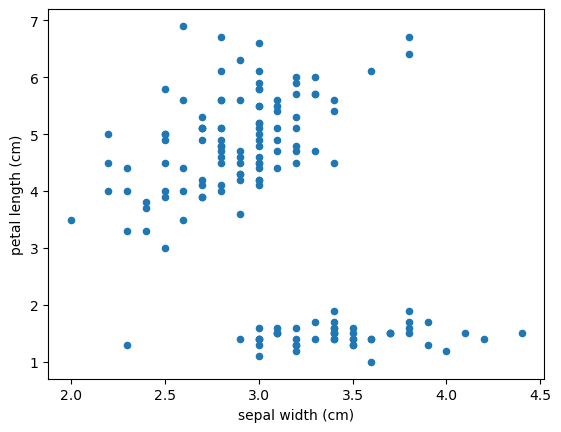

In [18]:
df.iloc[:,[1,2]].plot(kind='scatter', x=0, y=1)

## Normalization

The first operation is the linear normalization performed by the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) class. This class performs the following transformation:

$$v' = \frac{v-min}{max-min} * (max'-min') + min'$$

where $max,min$ are the maximum and minimum value of the attribute, $max',min'$ are the maximum and minimum value in the new scale, $v'$ is the new value of the attribute, and $v$ is the original value of the attribute.

We will be transforming only the features of iris flowers, not the labels (the last column), so in the first step we will store these four features in a separate `X` variable.

In [19]:
# get all rows and all but the last column into X
X = df.iloc[:, :-1]

In [20]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
# don't forget to remove the label column from the list of columns
cols = df.columns[:-1]

The following code performs normalization of the entire dataset. All preprocessors follow the pattern of `fit().transform()`.

In [23]:
norm = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X)
X_minmax = pd.DataFrame(norm.transform(X), columns=cols)

X_minmax.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [24]:
X_minmax.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


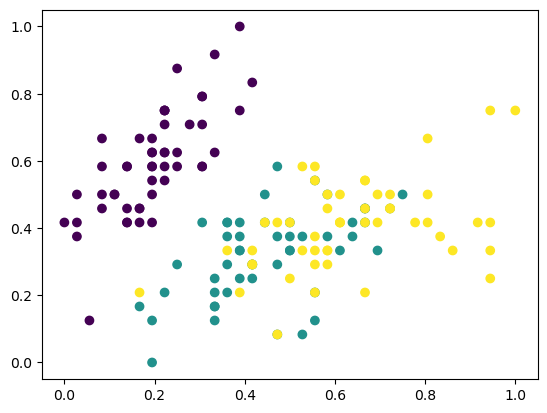

In [25]:
x = X_minmax['sepal length (cm)'][:]
y = X_minmax['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Standarization

Another type of normalization is the *standarization*, which is the transformation after which the mean value of the feature is 0 and its standard deviation is 1. In the `scikit-learn` library standarization is performed by the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) class which performs the following transformation:

$$v' = \frac{v-\mu}{\sigma}$$

where $\mu$ is the mean, and $\sigma$ is the standard deviation of the feature.

In [26]:
scale = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scale.transform(X), columns=cols)

X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [27]:
X_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


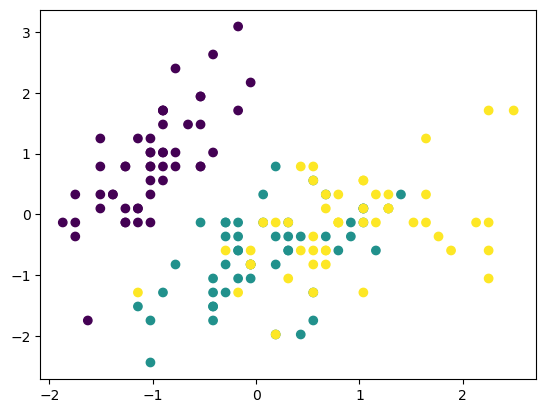

In [28]:
x = X_scaled['sepal length (cm)'][:]
y = X_scaled['sepal width (cm)'][:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Discretization 

An alternative for the manual discretization is the automatic discovery of bin boundaries using the [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) class. It finds *k* bins in the feature so that the geometric means of bins are as far as possible.

C:\ProgramData\Anaconda3\envs\data-mining\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


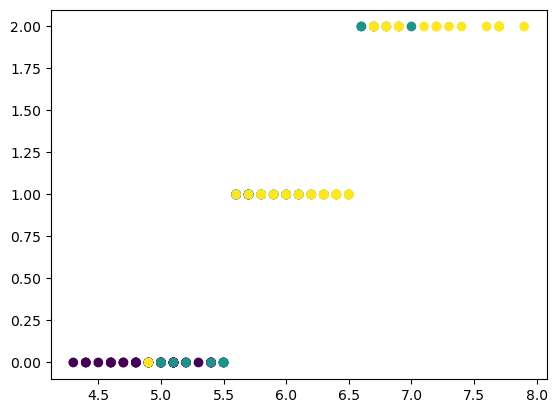

In [30]:
OMP_NUM_THREADS=1

kbin = preprocessing.KBinsDiscretizer(n_bins=3, strategy='kmeans', encode='ordinal').fit(df[['sepal length (cm)']])

df_kbinned = pd.DataFrame(kbin.transform(df[['sepal length (cm)']]))

x = df['sepal length (cm)'][:]
y = df_kbinned[:]
t = df['target']

plt.scatter(x, y, c=t)
plt.show()

## Binarization

Sometimes we need to transform a discrete attribute into a binary flag representing the result of a test performed on the feature. This can be easily achieved using the [Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) class.

In [31]:
binarize = preprocessing.Binarizer(threshold=3).fit(X)

X_binned = pd.DataFrame(binarize.transform(X), columns=cols)

pd.concat([df,X_binned], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2,0,1.0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,1.0,0.0,0.0


## Displaying histograms

For simple counting of values in a feature we can use:
- `pandas.Series.value_counts()`
- `collections.Counter`

and we just want to draw the histogram, it is enough to use `pandas.Series.hist()`

In [32]:
X_binned['sepal width (cm)'].value_counts()

0.0    83
1.0    67
Name: sepal width (cm), dtype: int64

In [33]:
from collections import Counter

Counter(X_binned['sepal width (cm)'].values)

Counter({1.0: 67, 0.0: 83})

array([[<AxesSubplot: title={'center': 'sepal length (cm)'}>,
        <AxesSubplot: title={'center': 'sepal width (cm)'}>],
       [<AxesSubplot: title={'center': 'petal length (cm)'}>,
        <AxesSubplot: title={'center': 'petal width (cm)'}>]],
      dtype=object)

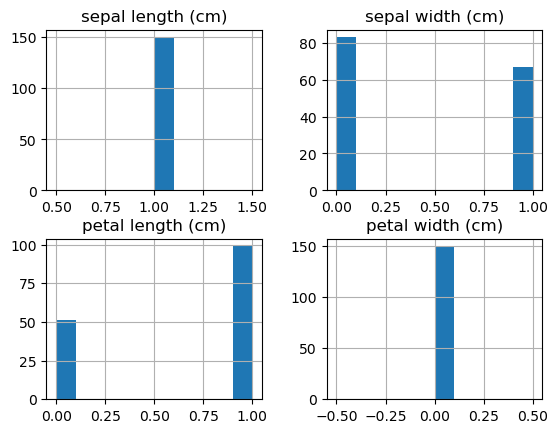

In [34]:
X_binned.hist()

## Missing values imputation

Missing values can seriously impact the results of the analysis. Many data mining algorithms do not accept datasets with missing values present. [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class allows to change the missing values to mean, median, or mode of the feature.

In [35]:
from sklearn.impute import SimpleImputer

matrix = np.array([[ 1, 2, np.nan], [np.nan, 4, 5], [6, np.nan, 7]])

# alternative strategies are 'mean', 'median' and 'most_frequent'
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(matrix)

print(matrix)
print(imp.transform(matrix))

[[ 1.  2. nan]
 [nan  4.  5.]
 [ 6. nan  7.]]
[[1.  2.  6. ]
 [3.5 4.  5. ]
 [6.  3.  7. ]]


## Label encoding

A very often used class is the [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) which transforms a categorical feature into a set of binary flags. For a feature with *k* distinct values, *k* new binary features will be created which represent a bitmap index on the feature.

In [36]:
df_target = df['target'].values

print(df_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [37]:
one_hot = preprocessing.OneHotEncoder(categories='auto').fit(df_target.reshape(-1,1))

one_hot.transform(df_target.reshape(-1,1)).todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [38]:
one_hot.inverse_transform(np.array([[0,0,1]]))

array([[2]])

# Assignment

Refer to the documentation of the [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) class which performs normalization of individual instances in the learning set. Perform normalization of the Iris set, while checking the effect of changing the value of the `norm` parameter used when initializing the class.

hint : use the [DataFrame.sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) method.